In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def drawTimingCurve(timingData):
    plt.plot(timingData['Unnamed: 0'], timingData['test'], 'go-', label = 'Test')
    plt.plot(timingData['Unnamed: 0'], timingData['train'], 'bo-', label = 'Train')

    plt.legend()
    plt.xlabel('Amount of Data Used to Train')
    plt.ylabel('Execution Time (seconds)')

    plt.show()

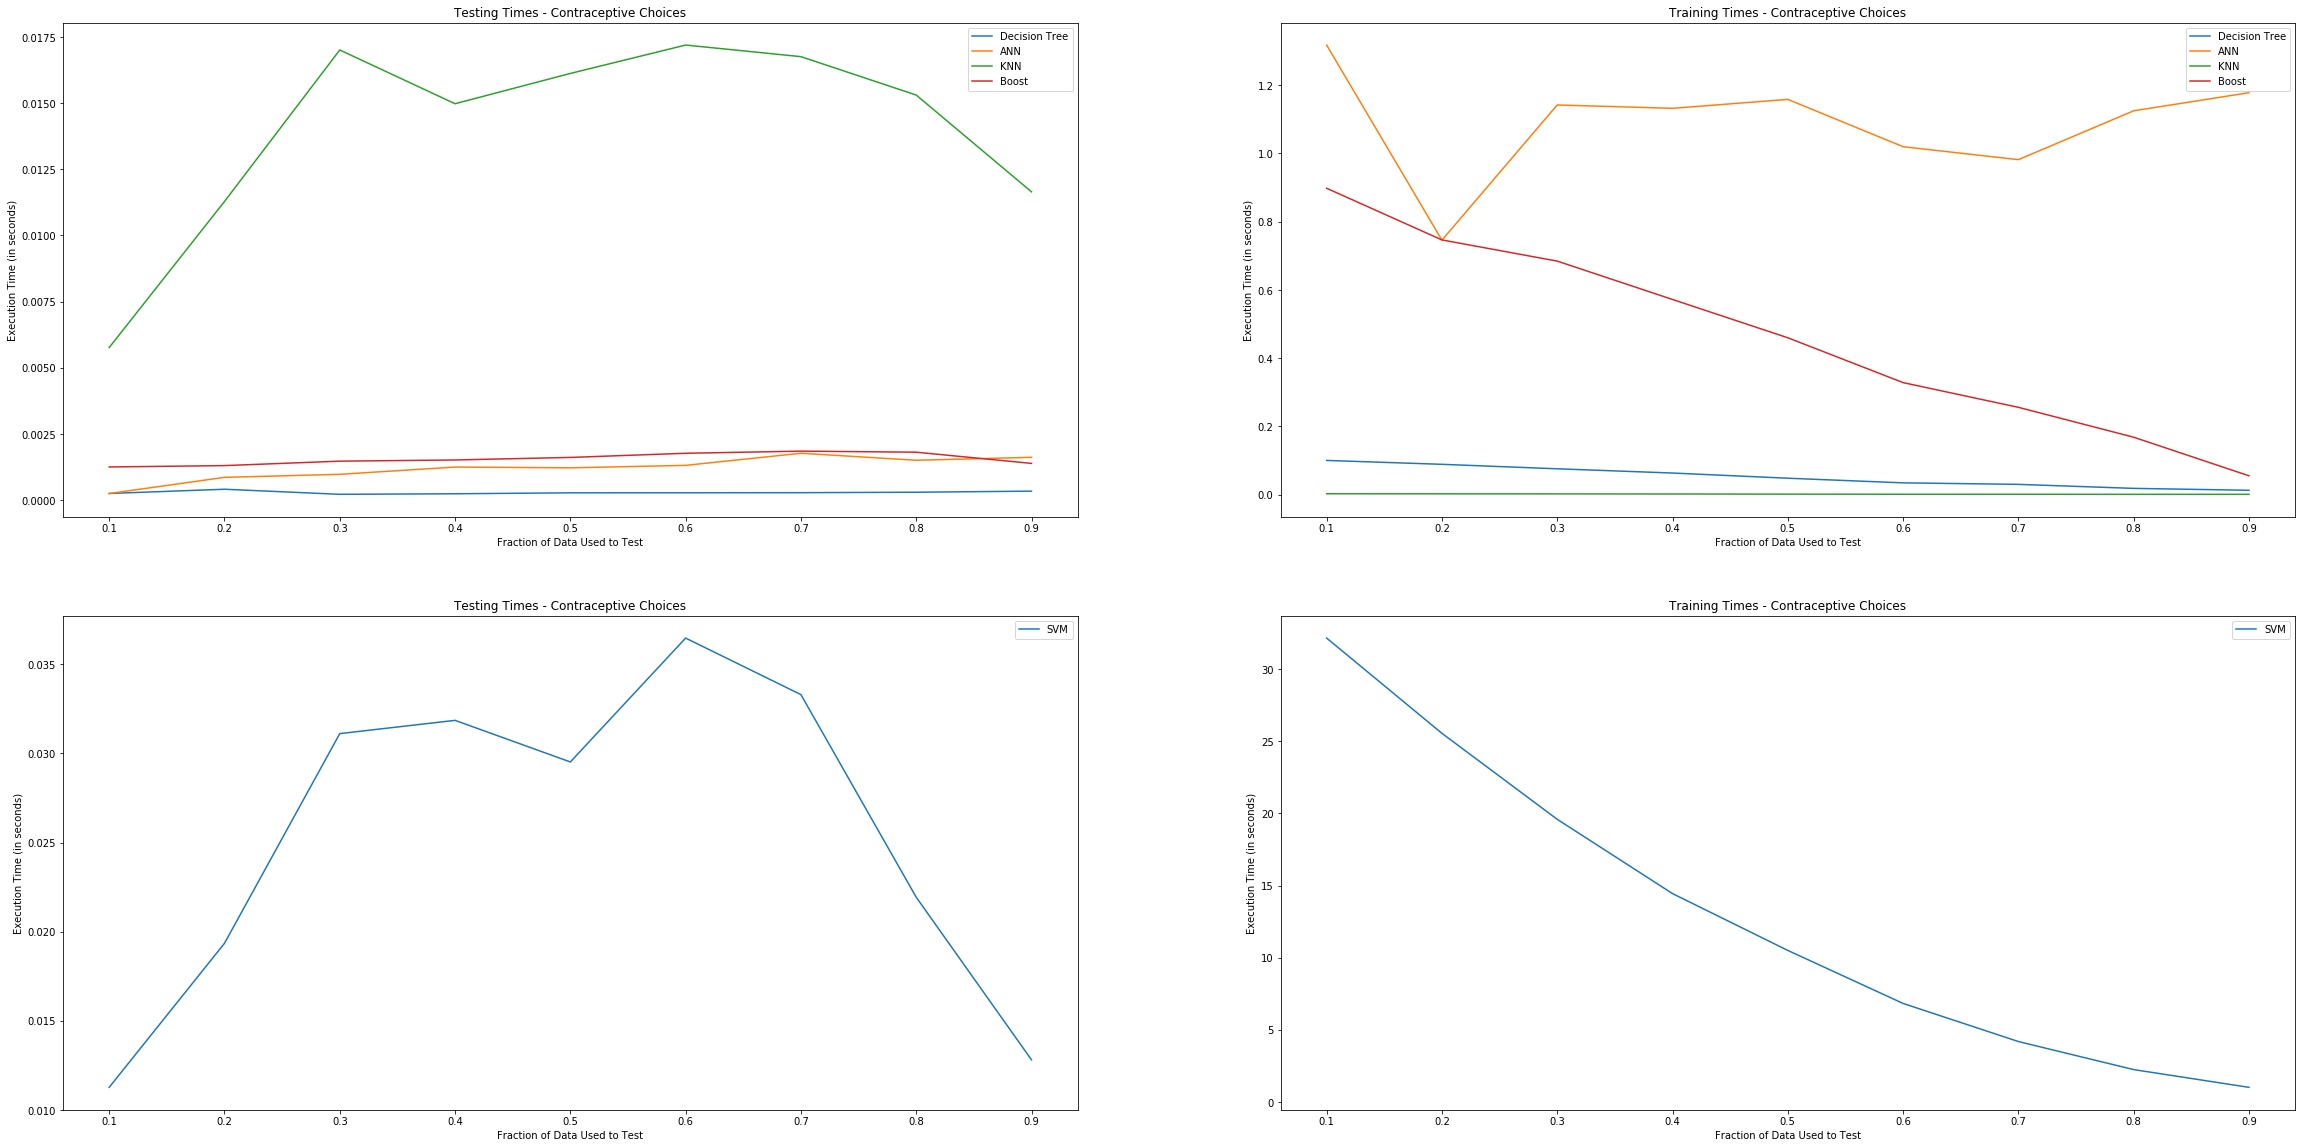

In [42]:
plt.figure(figsize = (40, 20))
plt.subplot(221)

timingData = pd.read_csv('output/DT_contra_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['test'], label = 'Decision Tree')

timingData = pd.read_csv('output/ANN_contra_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['test'], label = 'ANN')

timingData = pd.read_csv('output/KNN_contra_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['test'], label = 'KNN')

timingData = pd.read_csv('output/Boost_contra_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['test'], label = 'Boost')

plt.title("Testing Times - Contraceptive Choices")
plt.ylabel("Execution Time (in seconds)")
plt.xlabel("Fraction of Data Used to Test")
plt.legend()

plt.subplot(222)

timingData = pd.read_csv('output/DT_contra_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['train'], label = 'Decision Tree')

timingData = pd.read_csv('output/ANN_contra_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['train'], label = 'ANN')

timingData = pd.read_csv('output/KNN_contra_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['train'], label = 'KNN')

timingData = pd.read_csv('output/Boost_contra_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['train'], label = 'Boost')

plt.title("Training Times - Contraceptive Choices")
plt.ylabel("Execution Time (in seconds)")
plt.xlabel("Fraction of Data Used to Test")
plt.legend()

plt.subplot(223)
timingData = pd.read_csv('output/SVM_RBF_contra_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['test'], label = 'SVM')

plt.title("Testing Times - Contraceptive Choices")
plt.ylabel("Execution Time (in seconds)")
plt.xlabel("Fraction of Data Used to Test")
plt.legend()

plt.subplot(224)
timingData = pd.read_csv('output/SVM_RBF_contra_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['train'], label = 'SVM')

plt.title("Training Times - Contraceptive Choices")
plt.ylabel("Execution Time (in seconds)")
plt.xlabel("Fraction of Data Used to Test")
plt.legend()

plt.savefig('output/Timing_curves_contra.png')

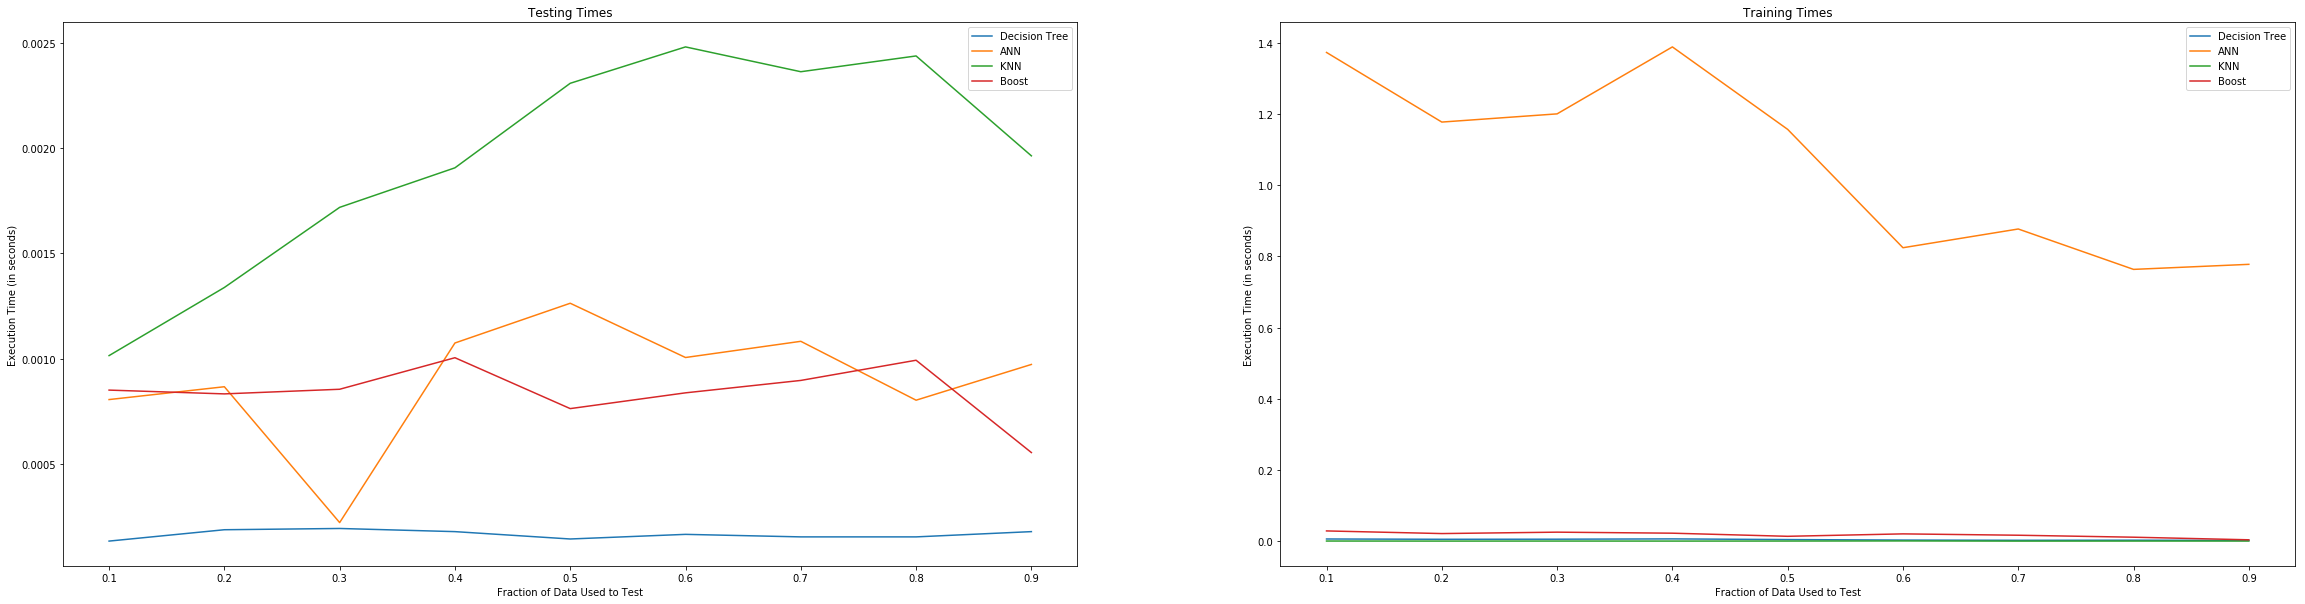

In [36]:
plt.figure(figsize = (40, 10))
plt.subplot(121)

timingData = pd.read_csv('output/DT_cancer_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['test'], label = 'Decision Tree')

timingData = pd.read_csv('output/ANN_cancer_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['test'], label = 'ANN')

timingData = pd.read_csv('output/KNN_cancer_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['test'], label = 'KNN')

timingData = pd.read_csv('output/Boost_cancer_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['test'], label = 'Boost')

#timingData = pd.read_csv('output/SVM_RBF_cancer_timing.csv')
#plt.plot(timingData['Unnamed: 0'], timingData['test'], label = 'SVM')

plt.title("Testing Times")
plt.ylabel("Execution Time (in seconds)")
plt.xlabel("Fraction of Data Used to Test")
plt.legend()

plt.subplot(122)

timingData = pd.read_csv('output/DT_cancer_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['train'], label = 'Decision Tree')

timingData = pd.read_csv('output/ANN_cancer_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['train'], label = 'ANN')

timingData = pd.read_csv('output/KNN_cancer_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['train'], label = 'KNN')

timingData = pd.read_csv('output/Boost_cancer_timing.csv')
plt.plot(timingData['Unnamed: 0'], timingData['train'], label = 'Boost')

#timingData = pd.read_csv('output/SVM_RBF_cancer_timing.csv')
#plt.plot(timingData['Unnamed: 0'], timingData['train'], label = 'SVM')

plt.title("Training Times")
plt.ylabel("Execution Time (in seconds)")
plt.xlabel("Fraction of Data Used to Test")
plt.legend()

In [2]:
def plotLC(train, test, name = None):
    test_means = test.drop('Unnamed: 0', axis = 1).mean(axis = 1)
    train_means = train.drop('Unnamed: 0', axis = 1).mean(axis = 1)

    plt.plot(train['Unnamed: 0'], train_means, label = 'train')
    plt.plot(test['Unnamed: 0'], test_means, label = 'test')
    
    plt.legend()
    plt.xlabel('Number of Training Samples')
    plt.ylabel('Accuracy')
    plt.title('{} Best Parameters Learning Curve'.format(name))

In [3]:
# For the data sets that use iteration (boosting, knn, and apparently SVM), I'm going to compare the ITER and normal LCs
def plotIterLC(iter_data):
    plt.plot(iter_data.param_SVM__n_iter, iter_data.mean_train_score)
    plt.plot(iter_data.param_SVM__n_iter, iter_data.mean_test_score)

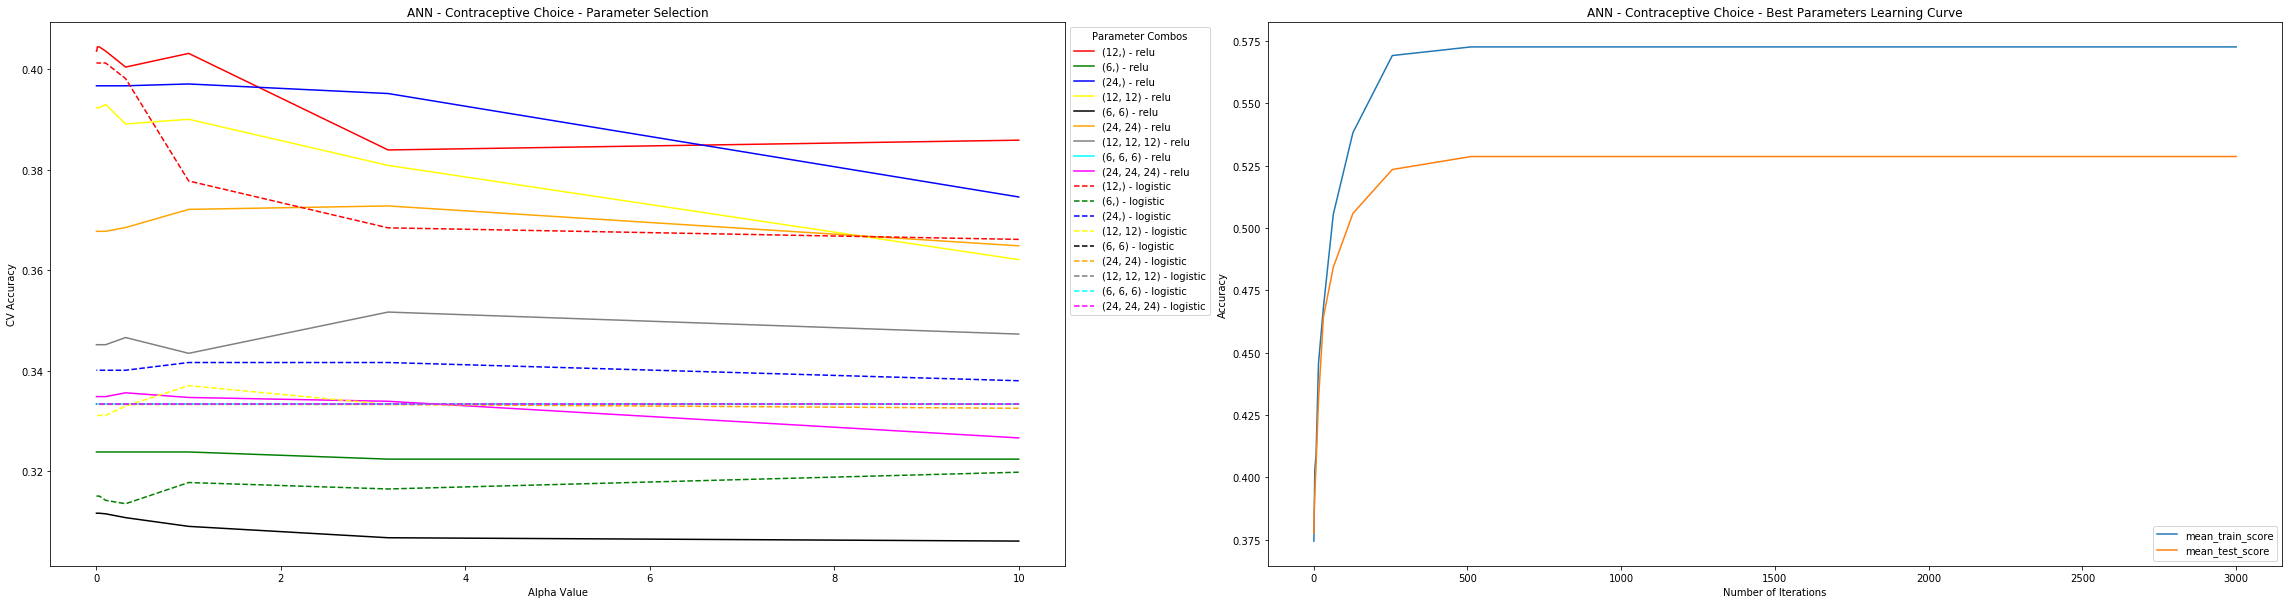

In [16]:
# Let's work on ann parameter selection plots

ann_params = pd.read_csv('output/ann_contra_reg.csv')

ann_layers = ann_params.param_MLP__hidden_layer_sizes.unique()
ann_activations = ann_params.param_MLP__activation.unique()


linetypes = ['-', '--']
line_ind = -1

colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'gray', 'cyan', 'magenta']

plt.figure(figsize = (40, 10))
plt.subplot(121)

for act in ann_activations:
    line_ind += 1
    color_ind = -1
    for layer in ann_layers:
        color_ind += 1
        plt.plot(ann_params[(ann_params.param_MLP__hidden_layer_sizes == layer) & (ann_params.param_MLP__activation == act)].param_MLP__alpha, 
                 ann_params[(ann_params.param_MLP__hidden_layer_sizes == layer) & (ann_params.param_MLP__activation == act)].mean_test_score,
                 label = layer + ' - '+ act,
                 linestyle = linetypes[line_ind],
                 color = colors[color_ind])

#line_ind = -1
line_ind = 1

plt.legend(bbox_to_anchor = [1, 1], title = 'Parameter Combos')

plt.xlabel('Alpha Value')
plt.ylabel('CV Accuracy')
plt.title('ANN - Contraceptive Choice - Parameter Selection')

plt.subplot(122)

ann_iter = pd.read_csv('output/ITER_base_ann_contra.csv')

# Since the accuracies don't change after ~200 we'll limit the chart
#ann_iter = ann_iter[ann_iter.param_MLP__max_iter <= 500]

plt.plot(ann_iter.param_MLP__max_iter, ann_iter.mean_train_score)
plt.plot(ann_iter.param_MLP__max_iter, ann_iter.mean_test_score)

plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('ANN - Contraceptive Choice - Best Parameters Learning Curve')

plt.savefig('output/ann_contra_figures.png')

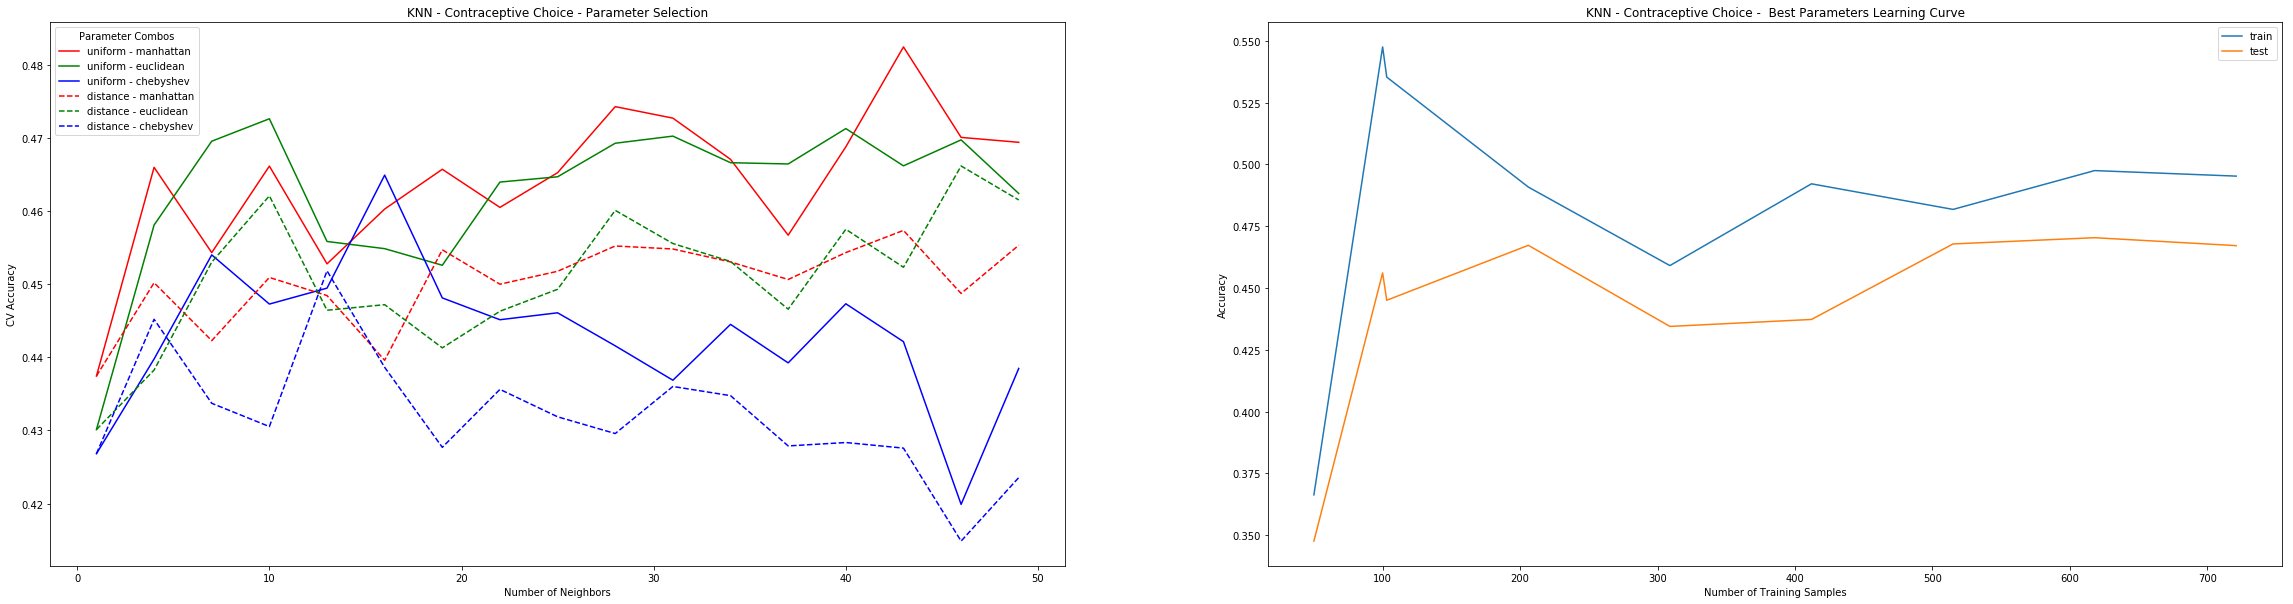

In [5]:
# Moving on to KNN

knn_params = pd.read_csv('output/KNN_contra_reg.csv')

knn_metric = knn_params.param_KNN__metric.unique()
knn_weights = knn_params.param_KNN__weights.unique()

linetypes = ['-', '--']
line_ind = -1

colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'gray', 'cyan', 'magenta']

plt.figure(figsize = (40, 10))
plt.subplot(121)

for weight in knn_weights:
    line_ind += 1
    color_ind = -1
    for metric in knn_metric:
        color_ind += 1
        plt.plot(knn_params[(knn_params.param_KNN__metric == metric) & (knn_params.param_KNN__weights == weight)].param_KNN__n_neighbors, 
                 knn_params[(knn_params.param_KNN__metric == metric) & (knn_params.param_KNN__weights == weight)].mean_test_score,
                 label = weight + ' - '+ metric,
                 linestyle = linetypes[line_ind],
                 color = colors[color_ind])

#plt.legend(bbox_to_anchor = [1, 1])
plt.legend(title = 'Parameter Combos')

plt.xlabel('Number of Neighbors')
plt.ylabel('CV Accuracy')
plt.title('KNN - Contraceptive Choice - Parameter Selection')

plt.subplot(122)

knn_test = pd.read_csv('output/knn_contra_LC_test.csv')
knn_train = pd.read_csv('output/knn_contra_LC_train.csv')

plotLC(knn_train, knn_test, 'KNN - Contraceptive Choice - ')

plt.savefig('output/KNN_contra_figures.png')

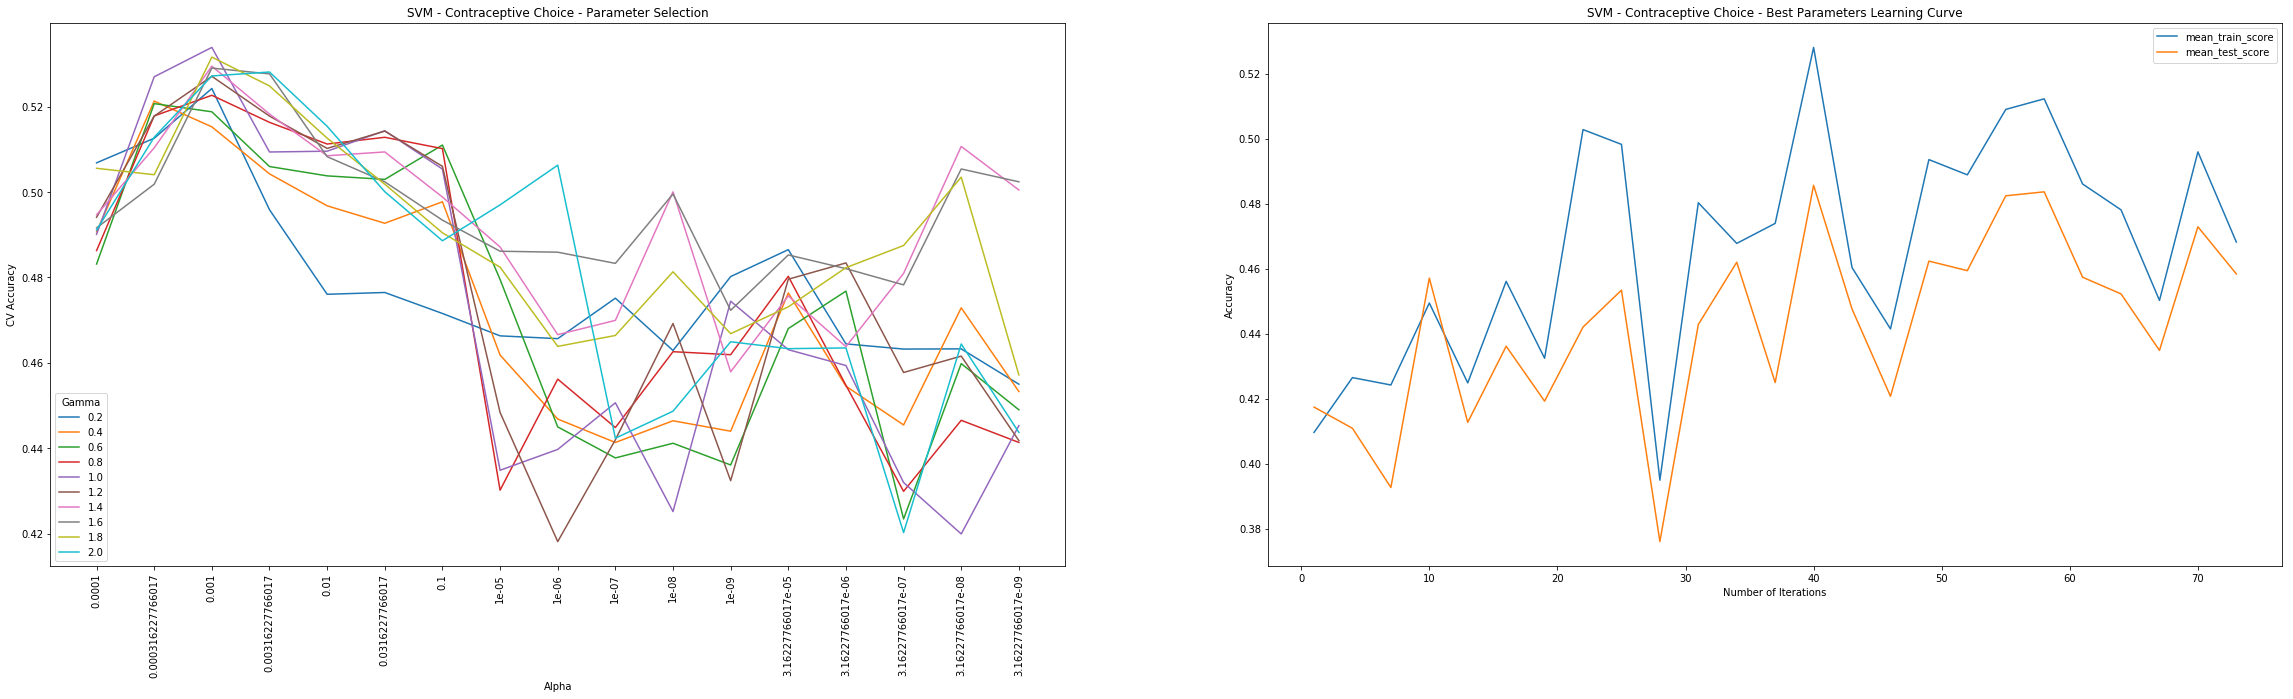

In [6]:
svm_params = pd.read_csv('output/SVM_RBF_contra_reg.csv')
svm_params.param_SVM__alpha = svm_params.param_SVM__alpha.astype(str)
svm_params.sort_values(by = ['param_SVM__alpha', 'param_SVM__gamma_frac'], inplace=True)

svm_gamma = svm_params.param_SVM__gamma_frac.unique()

linetypes = ['-', '--']
line_ind = -1

colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'gray', 'cyan', 'magenta']
color_ind = -1

plt.figure(figsize = (40, 10))
plt.subplot(121)

for gamma in svm_gamma:
    color_ind += 1
    plt.plot(#np.log(svm_params[(svm_params.param_SVM__gamma_frac == gamma)].param_SVM__alpha),
             svm_params[(svm_params.param_SVM__gamma_frac == gamma)].param_SVM__alpha.astype(str),
             svm_params[(svm_params.param_SVM__gamma_frac == gamma)].mean_test_score,
             label = gamma)

plt.xticks(rotation = 90)
#axis_ticks = svm_params.param_SVM__alpha.unique()
#plt.semilogx(axis_ticks, np.exp(axis_ticks))
#plt.xscale('exp')
plt.legend(title = 'Gamma')

plt.xlabel('Alpha')
plt.ylabel('CV Accuracy')
plt.title('SVM - Contraceptive Choice - Parameter Selection')

plt.subplot(122)

svm_iter = pd.read_csv('output/ITER_base_SVM_RBF_contra.csv')

#svm_iter = svm_iter[svm_iter.param_MLP__max_iter <= 500]

plt.plot(svm_iter.param_SVM__n_iter, svm_iter.mean_train_score)
plt.plot(svm_iter.param_SVM__n_iter, svm_iter.mean_test_score)

plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('SVM - Contraceptive Choice - Best Parameters Learning Curve')

plt.savefig('output/SVM_contra_figures.png')

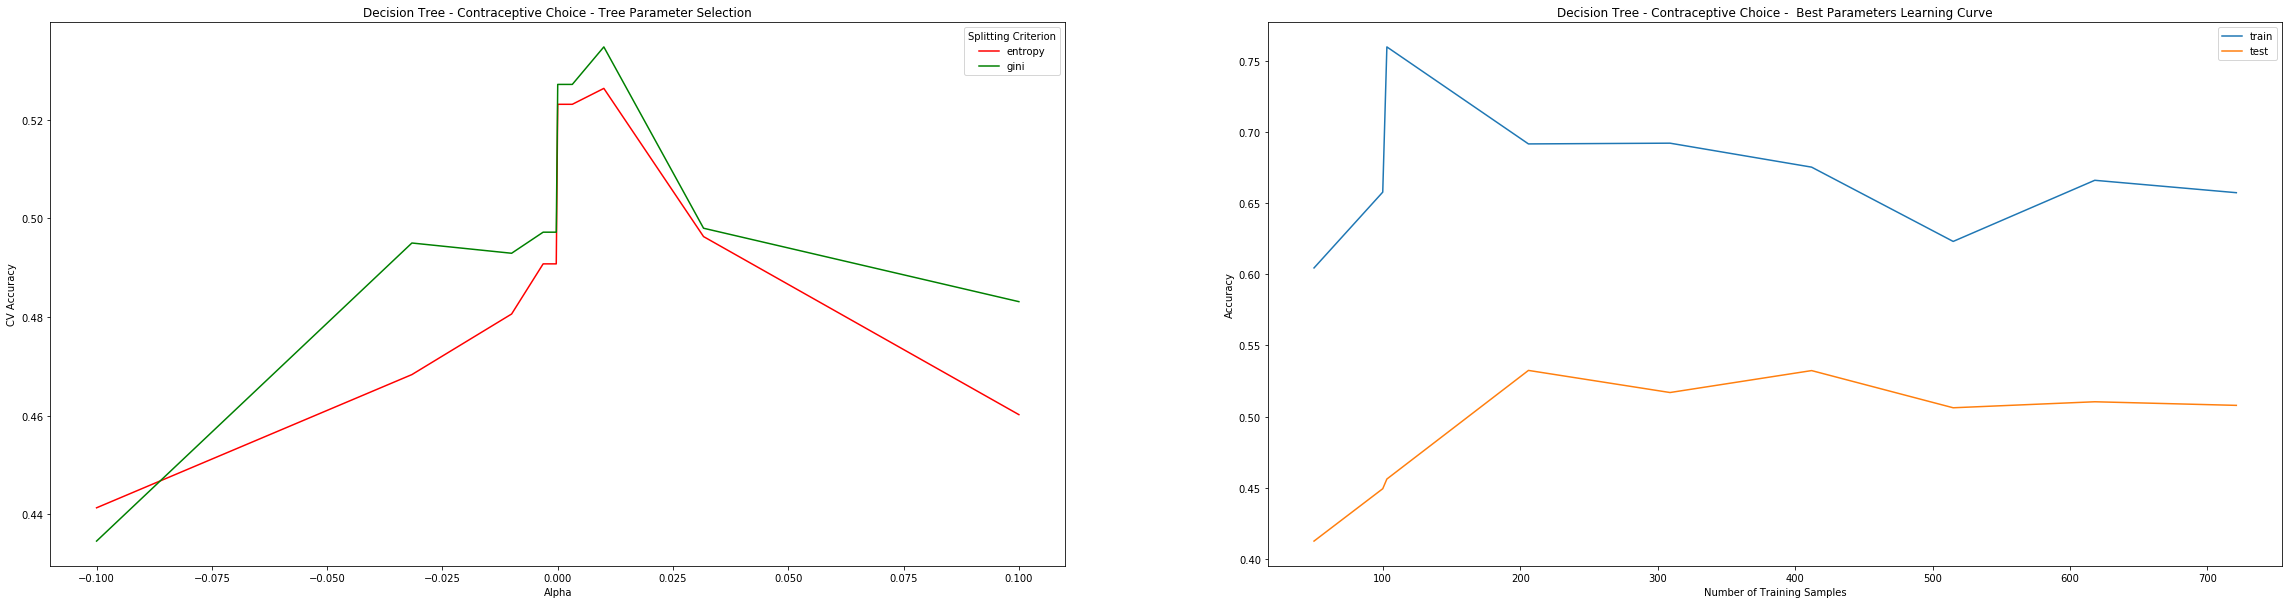

In [14]:
dt_params = pd.read_csv('output/DT_contra_reg.csv')
dt_params.sort_values(by = 'param_DT__alpha', inplace=True)
dt_params = dt_params[dt_params.param_DT__alpha > -1]

dt_criterion = dt_params.param_DT__criterion.unique()

linetypes = ['-', '--']
line_ind = -1

colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'gray', 'cyan', 'magenta']
color_ind = -1

plt.figure(figsize = (40, 10))
plt.subplot(121)

for criterion in dt_criterion:
    color_ind += 1
    plt.plot(dt_params[(dt_params.param_DT__criterion == criterion)].param_DT__alpha, 
             dt_params[(dt_params.param_DT__criterion == criterion)].mean_test_score,
             label = criterion,
             color = colors[color_ind])
    
plt.legend(title = 'Splitting Criterion')

plt.xlabel('Alpha')
plt.ylabel('CV Accuracy')
plt.title('Decision Tree - Contraceptive Choice - Tree Parameter Selection')

plt.subplot(122)

DT_test = pd.read_csv('output/DT_contra_LC_test.csv')
DT_train = pd.read_csv('output/DT_contra_LC_train.csv')

plotLC(DT_train, DT_test, 'Decision Tree - Contraceptive Choice - ')

plt.savefig('output/DT_contra_figures.png')

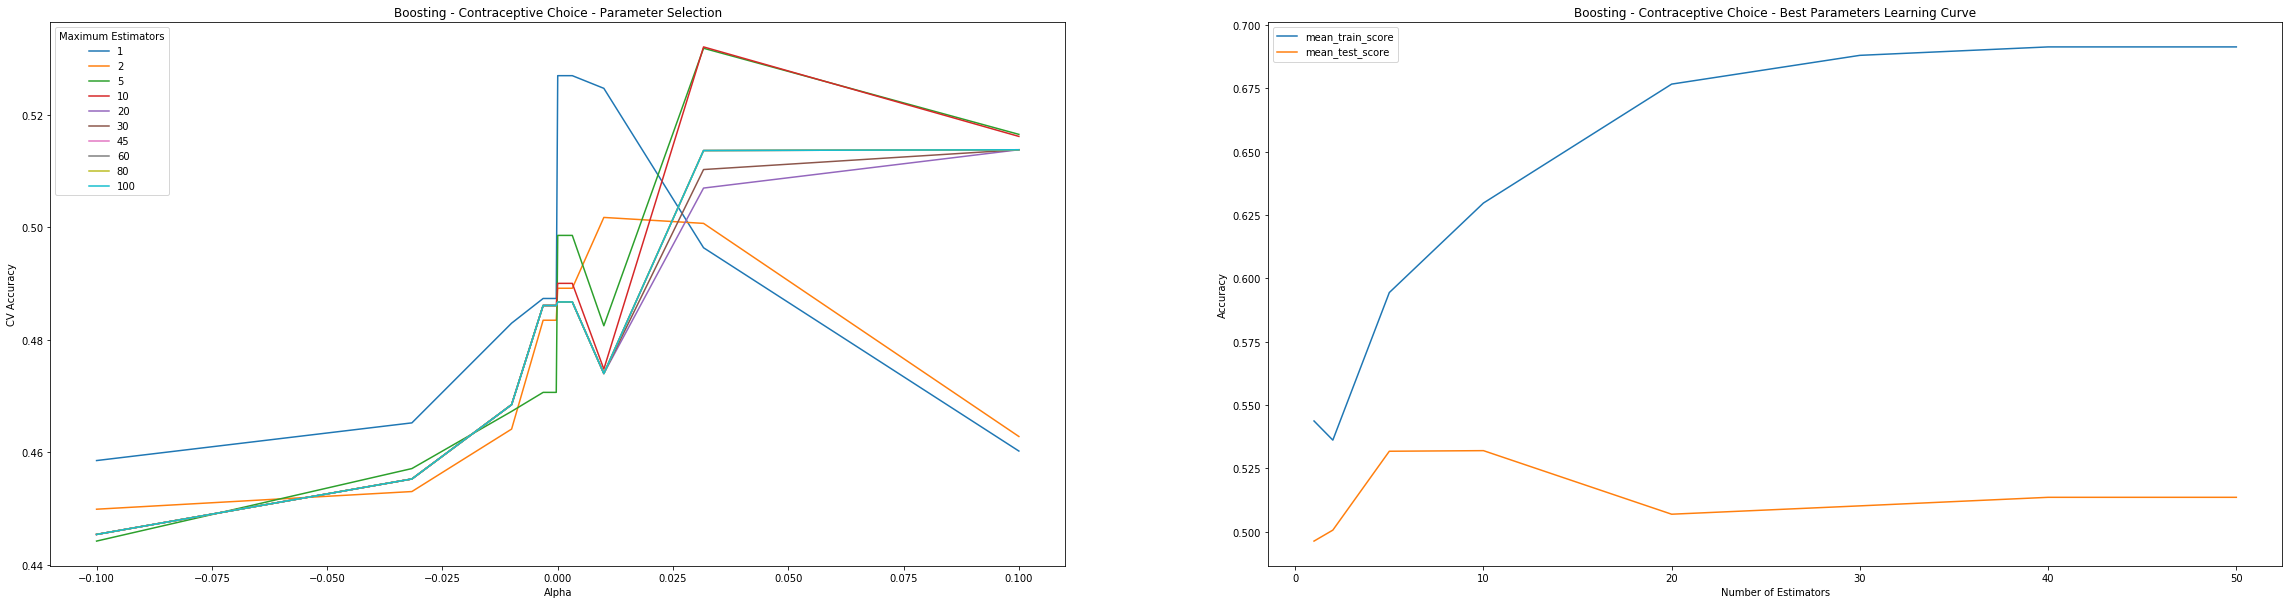

In [8]:
boost_params = pd.read_csv('output/Boost_contra_reg.csv')
boost_params.sort_values(by = ['param_Boost__base_estimator__alpha', 'param_Boost__n_estimators'], inplace=True)
boost_params = boost_params[boost_params.param_Boost__base_estimator__alpha > -1]

boost_estimator = boost_params.param_Boost__n_estimators.unique()

linetypes = ['-', '--']
line_ind = -1

colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'gray', 'cyan', 'magenta']
color_ind = -1

plt.figure(figsize = (40, 10))
plt.subplot(121)

for estimator in boost_estimator:
    color_ind += 1
    plt.plot(boost_params[(boost_params.param_Boost__n_estimators == estimator)].param_Boost__base_estimator__alpha, 
             boost_params[(boost_params.param_Boost__n_estimators == estimator)].mean_test_score,
             label = estimator)
    
plt.legend(title = 'Maximum Estimators')

plt.xlabel('Alpha')
plt.ylabel('CV Accuracy')
plt.title('Boosting - Contraceptive Choice - Parameter Selection')

plt.subplot(122)

boost_iter = pd.read_csv('output/ITER_base_Boost_contra.csv')

plt.plot(boost_iter.param_Boost__n_estimators, boost_iter.mean_train_score)
plt.plot(boost_iter.param_Boost__n_estimators, boost_iter.mean_test_score)

plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Boosting - Contraceptive Choice - Best Parameters Learning Curve')

plt.savefig('output/Boost_contra_figures.png')

## HERE BEGINS THE SECOND DATA SET'S CHARTS. HUZZAH!

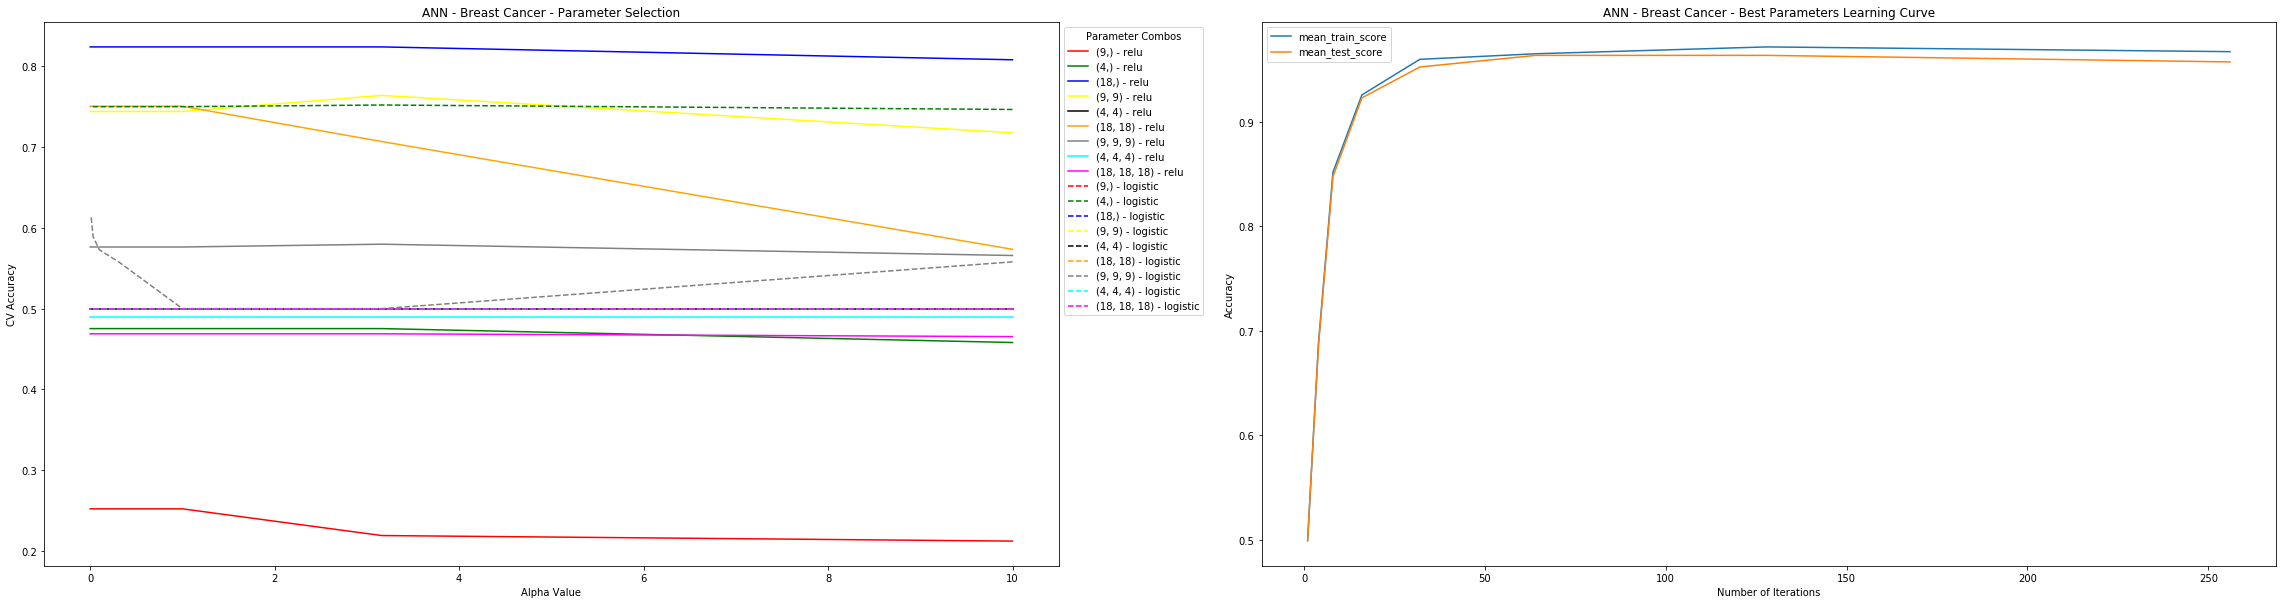

In [9]:
# Let's work on ann parameter selection plots

ann_params = pd.read_csv('output/ann_cancer_reg.csv')
#print(ann_params.head())

ann_layers = ann_params.param_MLP__hidden_layer_sizes.unique()
ann_activations = ann_params.param_MLP__activation.unique()
#print(len(ann_layers))
#print(len(ann_activations))

linetypes = ['-', '--']
line_ind = -1

colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'gray', 'cyan', 'magenta']

plt.figure(figsize = (40, 10))
plt.subplot(121)

for act in ann_activations:
    line_ind += 1
    color_ind = -1
    for layer in ann_layers:
        color_ind += 1
        plt.plot(ann_params[(ann_params.param_MLP__hidden_layer_sizes == layer) & (ann_params.param_MLP__activation == act)].param_MLP__alpha, 
                 ann_params[(ann_params.param_MLP__hidden_layer_sizes == layer) & (ann_params.param_MLP__activation == act)].mean_test_score,
                 label = layer + ' - '+ act,
                 linestyle = linetypes[line_ind],
                 color = colors[color_ind])

#line_ind = -1
line_ind = 1

plt.legend(bbox_to_anchor = [1, 1], title = 'Parameter Combos')

#for act in ann_activations:
#    #line_ind += 1
#    #color_ind = -1
#    for layer in ann_layers:
#        color_ind += 1
#        plt.plot(ann_params[(ann_params.param_MLP__hidden_layer_sizes == layer) & (ann_params.param_MLP__activation == act)].param_MLP__alpha, 
#                 ann_params[(ann_params.param_MLP__hidden_layer_sizes == layer) & (ann_params.param_MLP__activation == act)].mean_train_score,
#                 label = layer + ' - '+ act,
#                 linestyle = linetypes[line_ind])#,
#                 #color = colors[color_ind])
        
#plt.legend(bbox_to_anchor = [1, 1])
plt.xlabel('Alpha Value')
plt.ylabel('CV Accuracy')
plt.title('ANN - Breast Cancer - Parameter Selection')
#plt.show()
##plt.plot(ann_params.param_MLP__alpha, ann_params.mean_train_score)


plt.subplot(122)

ann_iter = pd.read_csv('output/ITER_base_ANN_cancer.csv')

# Since the accuracies don't change after ~200 we'll limit the chart
ann_iter = ann_iter[ann_iter.param_MLP__max_iter <= 500]

plt.plot(ann_iter.param_MLP__max_iter, ann_iter.mean_train_score)
plt.plot(ann_iter.param_MLP__max_iter, ann_iter.mean_test_score)

plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('ANN - Breast Cancer - Best Parameters Learning Curve')

plt.savefig('output/ann_cancer_figures.png')

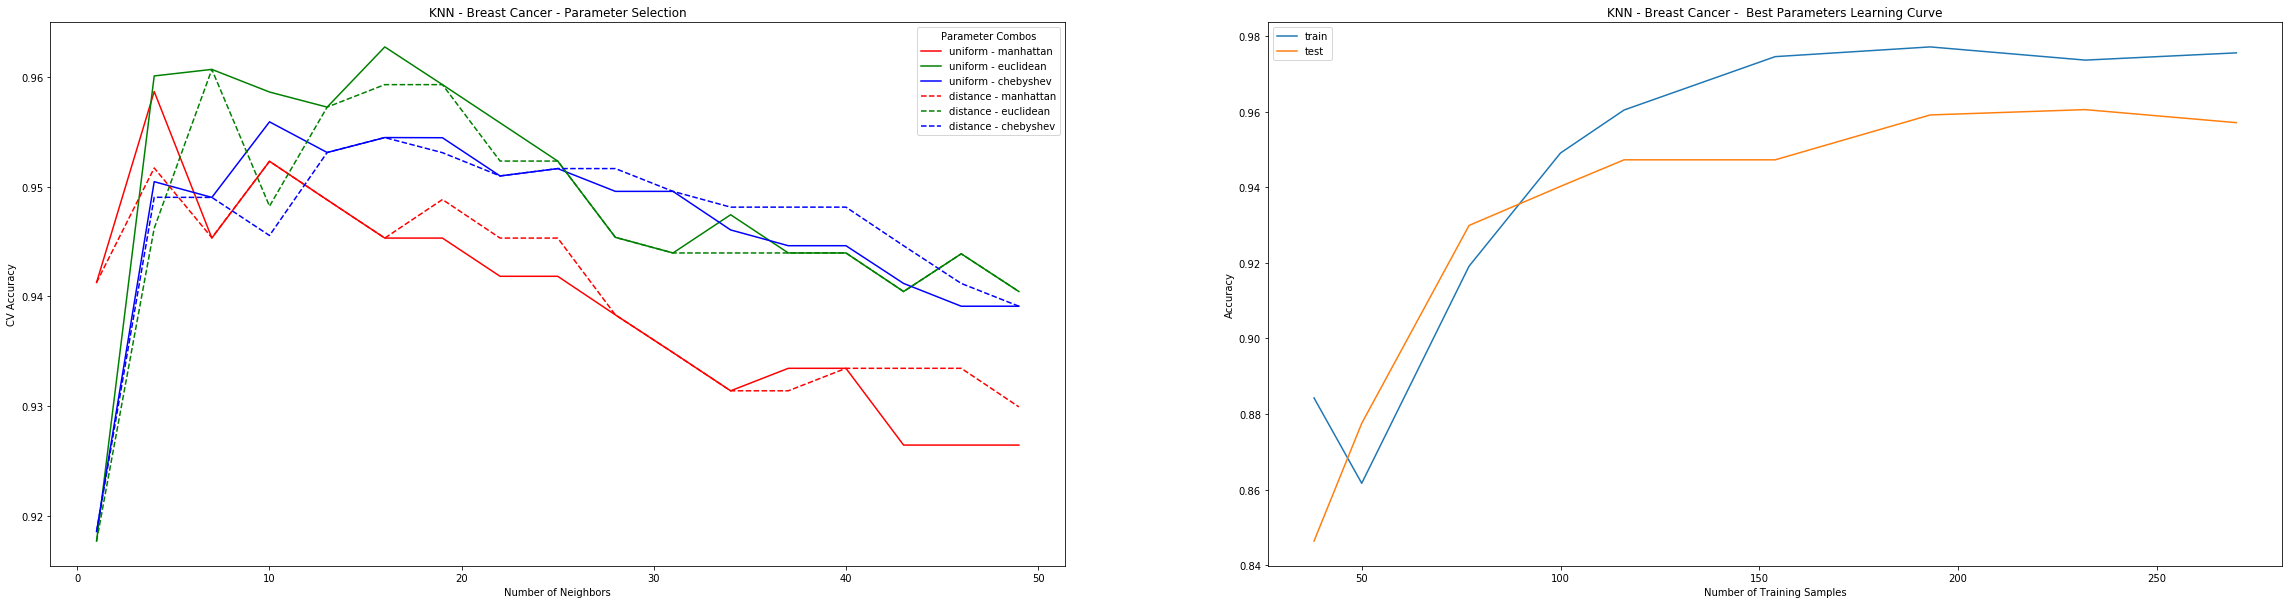

In [10]:
# Moving on to KNN

knn_params = pd.read_csv('output/KNN_cancer_reg.csv')

knn_metric = knn_params.param_KNN__metric.unique()
knn_weights = knn_params.param_KNN__weights.unique()

linetypes = ['-', '--']
line_ind = -1

colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'gray', 'cyan', 'magenta']

plt.figure(figsize = (40, 10))
plt.subplot(121)

for weight in knn_weights:
    line_ind += 1
    color_ind = -1
    for metric in knn_metric:
        color_ind += 1
        plt.plot(knn_params[(knn_params.param_KNN__metric == metric) & (knn_params.param_KNN__weights == weight)].param_KNN__n_neighbors, 
                 knn_params[(knn_params.param_KNN__metric == metric) & (knn_params.param_KNN__weights == weight)].mean_test_score,
                 label = weight + ' - '+ metric,
                 linestyle = linetypes[line_ind],
                 color = colors[color_ind])

#plt.legend(bbox_to_anchor = [1, 1])
plt.legend(title = 'Parameter Combos')

plt.xlabel('Number of Neighbors')
plt.ylabel('CV Accuracy')
plt.title('KNN - Breast Cancer - Parameter Selection')

plt.subplot(122)

knn_test = pd.read_csv('output/knn_cancer_LC_test.csv')
knn_train = pd.read_csv('output/knn_cancer_LC_train.csv')

plotLC(knn_train, knn_test, 'KNN - Breast Cancer - ')

plt.savefig('output/KNN_cancer_figures.png')

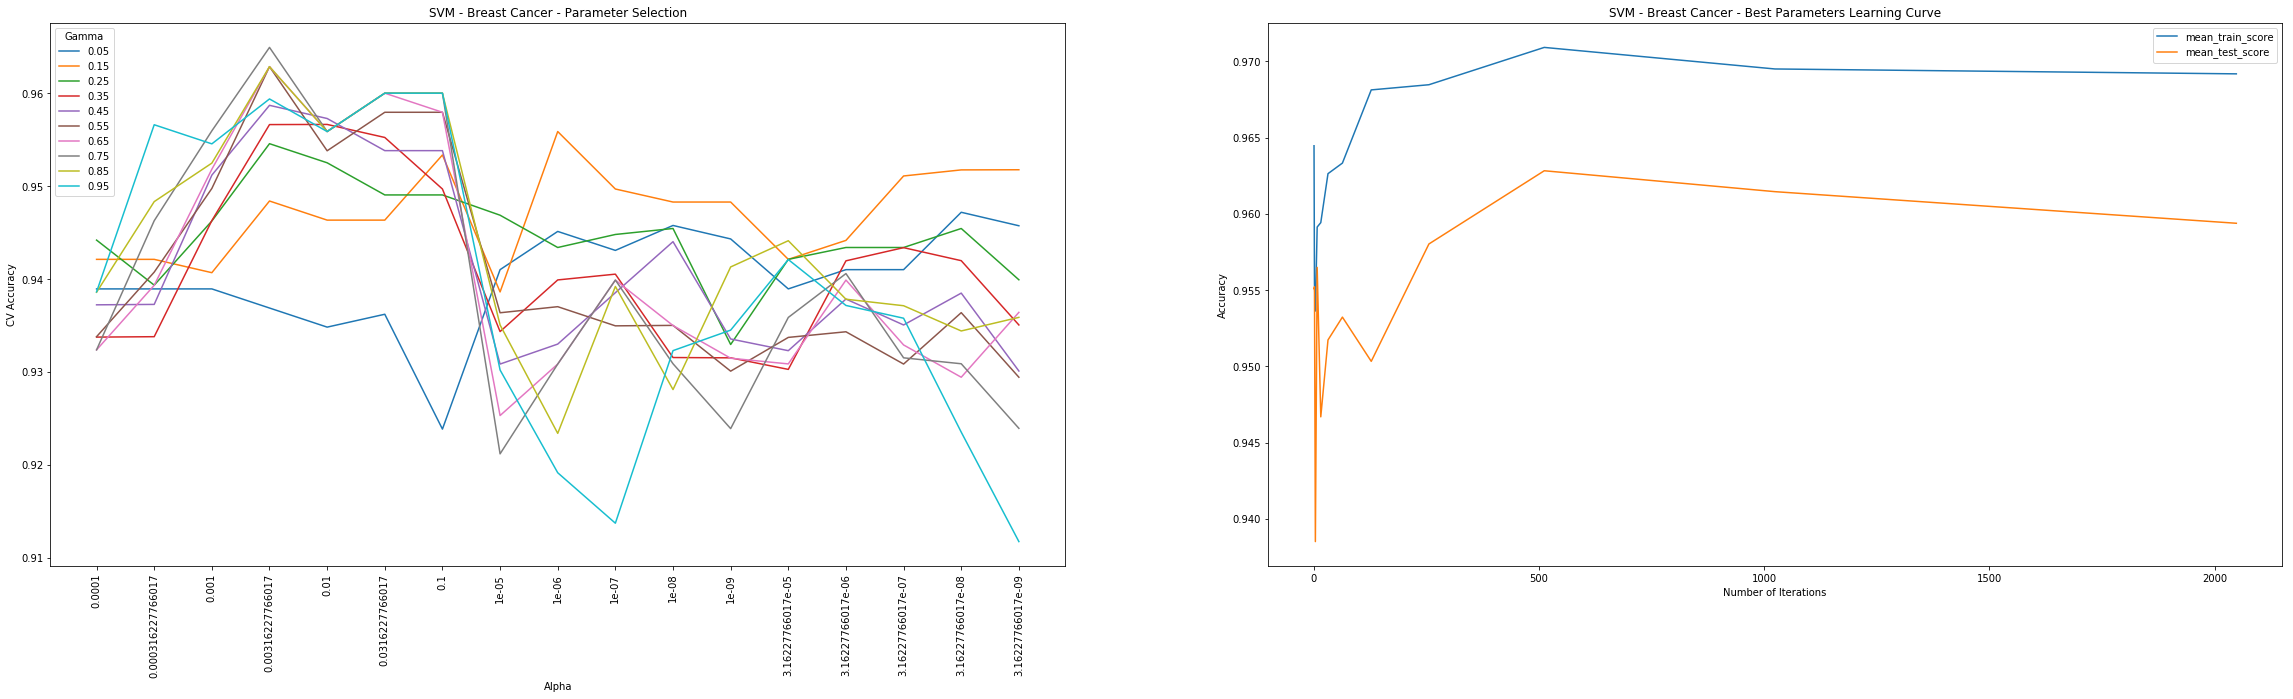

In [11]:
svm_params = pd.read_csv('output/SVM_RBF_cancer_reg.csv')
svm_params.param_SVM__alpha = svm_params.param_SVM__alpha.astype(str)
svm_params.sort_values(by = ['param_SVM__alpha', 'param_SVM__gamma_frac'], inplace=True)

svm_gamma = svm_params.param_SVM__gamma_frac.unique()

linetypes = ['-', '--']
line_ind = -1

colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'gray', 'cyan', 'magenta']
color_ind = -1

plt.figure(figsize = (40, 10))
plt.subplot(121)

for gamma in svm_gamma:
    color_ind += 1
    plt.plot(svm_params[(svm_params.param_SVM__gamma_frac == gamma)].param_SVM__alpha, 
             svm_params[(svm_params.param_SVM__gamma_frac == gamma)].mean_test_score,
             label = gamma)

plt.xticks(rotation = 90)
#axis_ticks = svm_params.param_SVM__alpha.unique()
#plt.semilogx(axis_ticks, np.exp(axis_ticks))
#plt.xscale('exp')
plt.legend(title = 'Gamma')

plt.xlabel('Alpha')
plt.ylabel('CV Accuracy')
plt.title('SVM - Breast Cancer - Parameter Selection')

plt.subplot(122)

svm_iter = pd.read_csv('output/ITER_base_SVM_RBF_cancer.csv')

#svm_iter = svm_iter[svm_iter.param_MLP__max_iter <= 500]

plt.plot(svm_iter.param_SVM__n_iter, svm_iter.mean_train_score)
plt.plot(svm_iter.param_SVM__n_iter, svm_iter.mean_test_score)

plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('SVM - Breast Cancer - Best Parameters Learning Curve')

plt.savefig('output/SVM_cancer_figures.png')

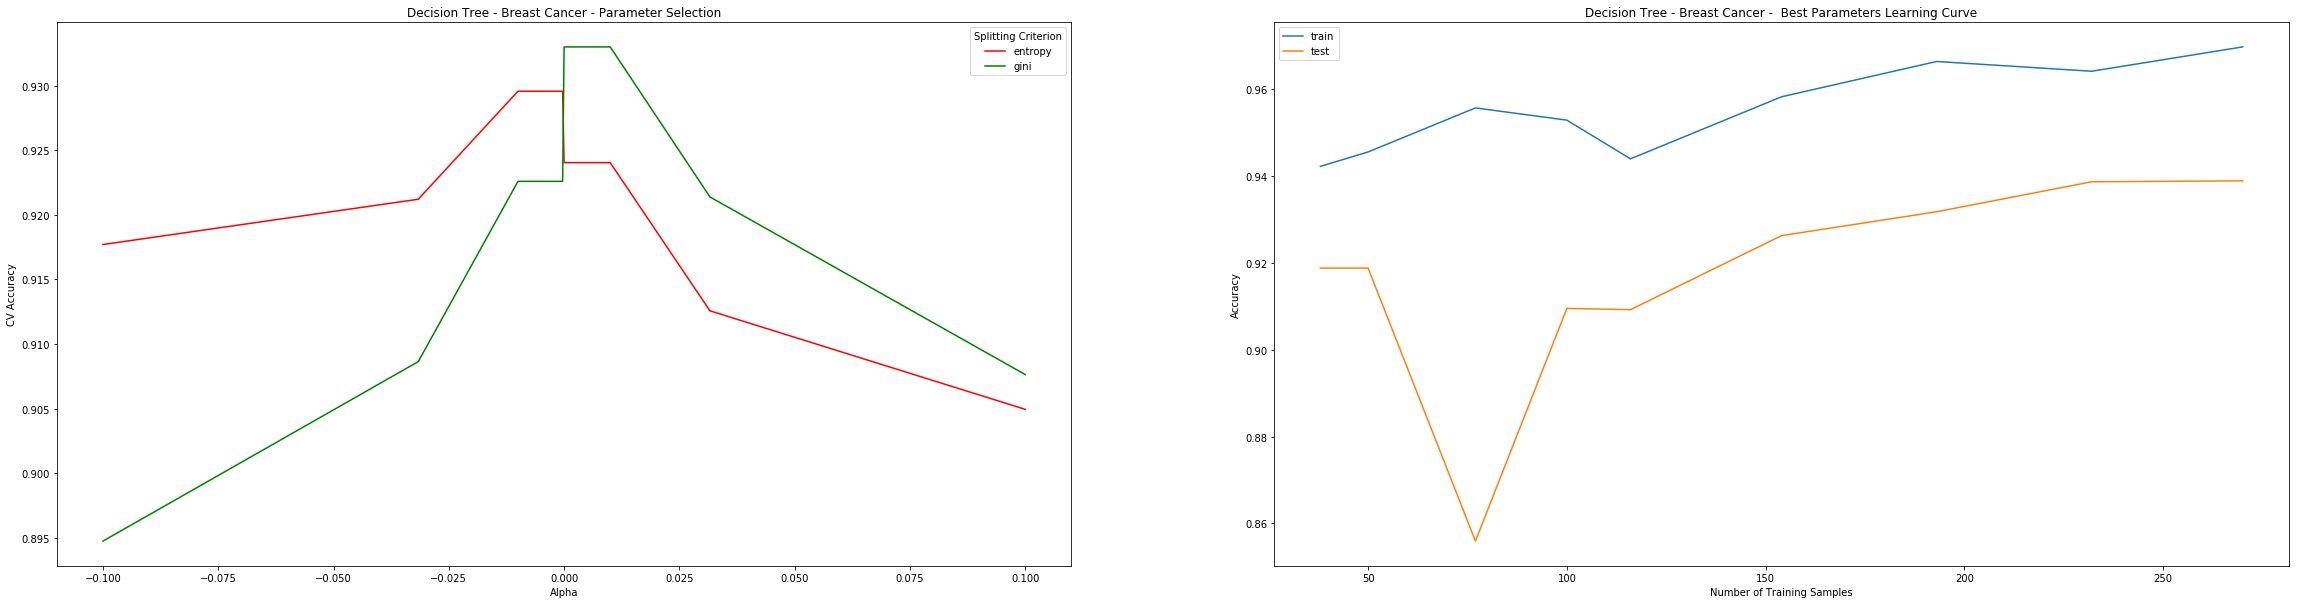

In [12]:
dt_params = pd.read_csv('output/DT_cancer_reg.csv')
dt_params.sort_values(by = 'param_DT__alpha', inplace=True)
dt_params = dt_params[dt_params.param_DT__alpha > -1]

dt_criterion = dt_params.param_DT__criterion.unique()

linetypes = ['-', '--']
line_ind = -1

colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'gray', 'cyan', 'magenta']
color_ind = -1

plt.figure(figsize = (40, 10))
plt.subplot(121)

for criterion in dt_criterion:
    color_ind += 1
    plt.plot(dt_params[(dt_params.param_DT__criterion == criterion)].param_DT__alpha, 
             dt_params[(dt_params.param_DT__criterion == criterion)].mean_test_score,
             label = criterion,
             color = colors[color_ind])
    
plt.legend(title = 'Splitting Criterion')

plt.xlabel('Alpha')
plt.ylabel('CV Accuracy')
plt.title('Decision Tree - Breast Cancer - Parameter Selection')

plt.subplot(122)

DT_test = pd.read_csv('output/DT_cancer_LC_test.csv')
DT_train = pd.read_csv('output/DT_cancer_LC_train.csv')

plotLC(DT_train, DT_test, 'Decision Tree - Breast Cancer - ')

plt.savefig('output/DT_cancer_figures.png')

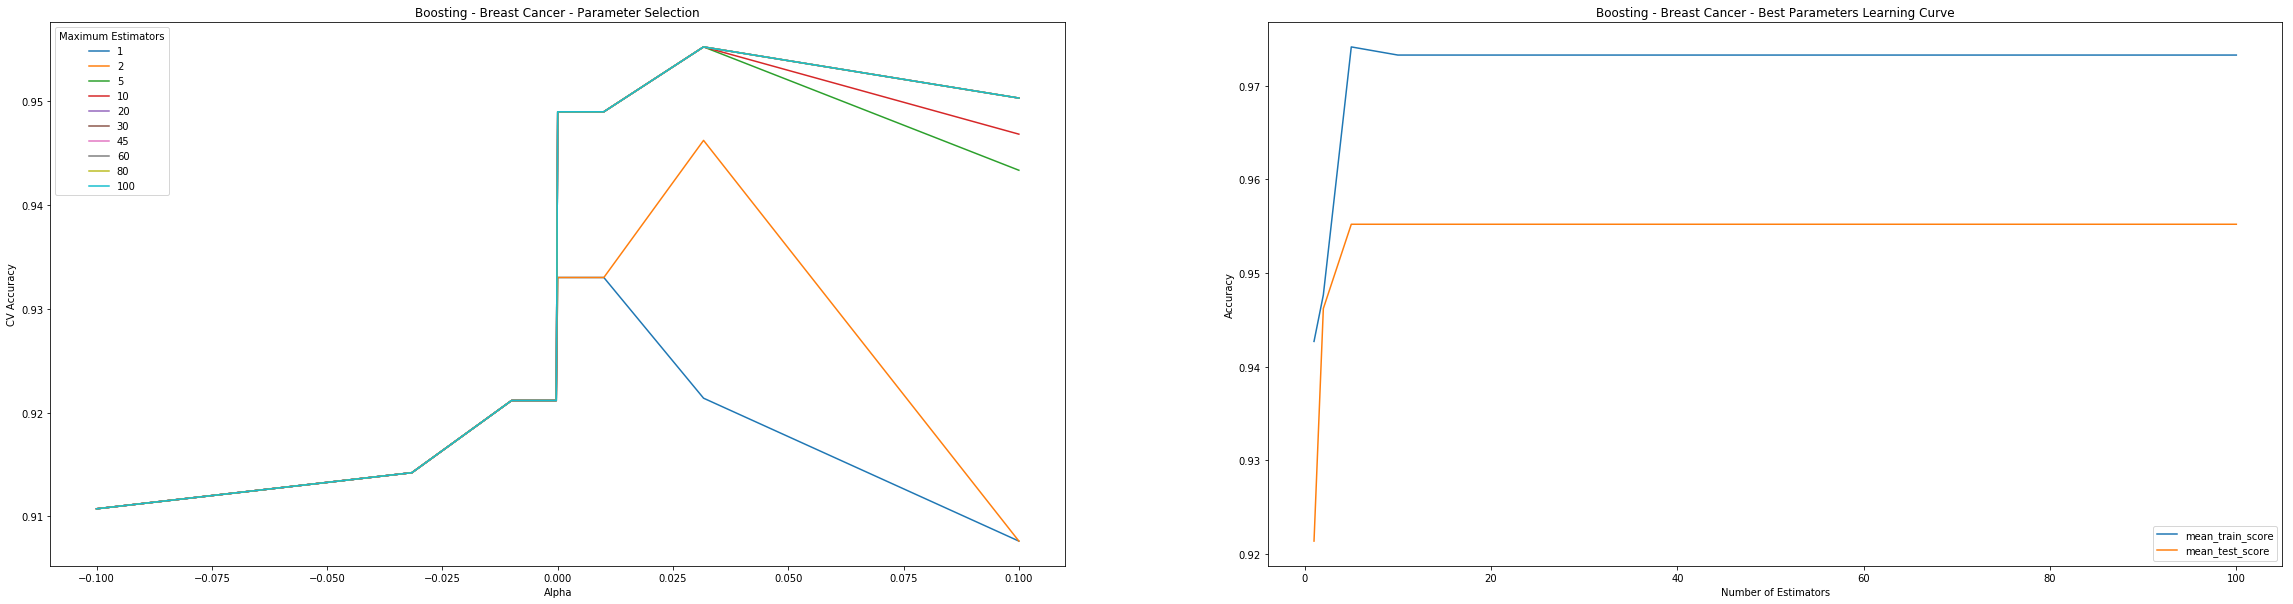

In [13]:
boost_params = pd.read_csv('output/Boost_cancer_reg.csv')
boost_params.sort_values(by = ['param_Boost__base_estimator__alpha', 'param_Boost__n_estimators'], inplace=True)
boost_params = boost_params[boost_params.param_Boost__base_estimator__alpha > -1]

boost_estimator = boost_params.param_Boost__n_estimators.unique()

linetypes = ['-', '--']
line_ind = -1

colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'gray', 'cyan', 'magenta']
color_ind = -1

plt.figure(figsize = (40, 10))
plt.subplot(121)

for estimator in boost_estimator:
    color_ind += 1
    plt.plot(boost_params[(boost_params.param_Boost__n_estimators == estimator)].param_Boost__base_estimator__alpha, 
             boost_params[(boost_params.param_Boost__n_estimators == estimator)].mean_test_score,
             label = estimator)
    
plt.legend(title = 'Maximum Estimators')

plt.xlabel('Alpha')
plt.ylabel('CV Accuracy')
plt.title('Boosting - Breast Cancer - Parameter Selection')

plt.subplot(122)

boost_iter = pd.read_csv('output/ITER_base_Boost_cancer.csv')

plt.plot(boost_iter.param_Boost__n_estimators, boost_iter.mean_train_score)
plt.plot(boost_iter.param_Boost__n_estimators, boost_iter.mean_test_score)

plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Boosting - Breast Cancer - Best Parameters Learning Curve')

plt.savefig('output/Boost_cancer_figures.png')

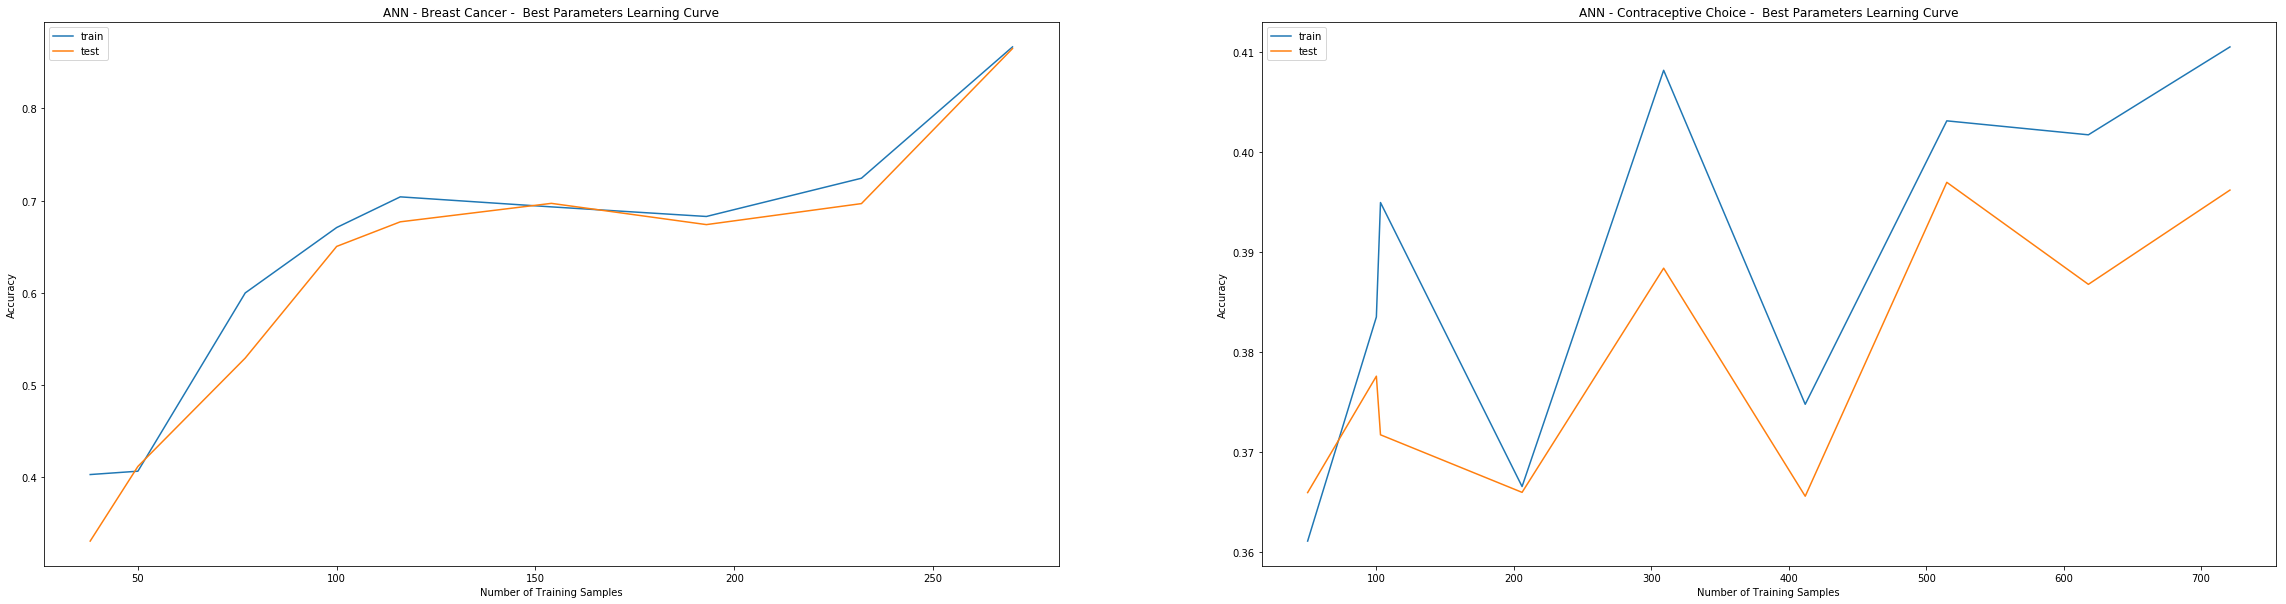

In [23]:
ANN_test = pd.read_csv('output/ANN_cancer_LC_test.csv')
ANN_train = pd.read_csv('output/ANN_cancer_LC_train.csv')

plt.figure(figsize = (40, 10))
plt.subplot(121)
plotLC(ANN_train, ANN_test, 'ANN - Breast Cancer - ')
plt.legend()

ANN_test = pd.read_csv('output/ANN_contra_LC_test.csv')
ANN_train = pd.read_csv('output/ANN_contra_LC_train.csv')

plt.subplot(122)
plotLC(ANN_train, ANN_test, 'ANN - Contraceptive Choice - ')
plt.legend()

plt.savefig('output/ANN_Curves_by_Training_Samples')